<a href="https://colab.research.google.com/github/IdealisticINTJ/ubiquitous-broccoli/blob/main/ANN_Handwritten-MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [4]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4832 - accuracy: 0.8592 - val_loss: 0.1431 - val_accuracy: 0.9567
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1500 - accuracy: 0.9553 - val_loss: 0.0969 - val_accuracy: 0.9707
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1083 - accuracy: 0.9684 - val_loss: 0.0915 - val_accuracy: 0.9724
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0843 - accuracy: 0.9742 - val_loss: 0.0778 - val_accuracy: 0.9761
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0706 - accuracy: 0.9776 - val_loss: 0.0714 - val_accuracy: 0.9789
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0654 - accuracy: 0.9790 - val_loss: 0.0684 - val_accuracy: 0.9789
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0550 - accuracy: 0.9822 - val_loss: 0.0728 - val_accuracy:

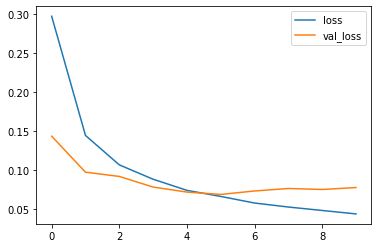

In [7]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

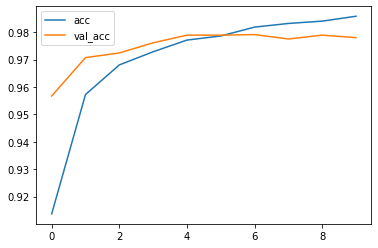

In [8]:
# Plotting accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [9]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0772 - accuracy: 0.9780
[0.07720915973186493, 0.9779999852180481]


Confusion matrix, without normalization
[[ 971    0    1    2    1    0    1    1    3    0]
 [   0 1123    1    4    0    0    1    0    6    0]
 [   6    5  991    7    2    0    1    6   12    2]
 [   0    0    0  996    0    4    0    4    4    2]
 [   1    0    5    0  968    0    2    0    1    5]
 [   2    0    0    8    2  867    2    2    7    2]
 [   3    3    1    1    9    2  935    0    4    0]
 [   1    3    6    8    2    0    0  996    3    9]
 [   2    0    1    5    5    3    0    2  952    4]
 [   2    2    0    3   12    2    0    4    3  981]]


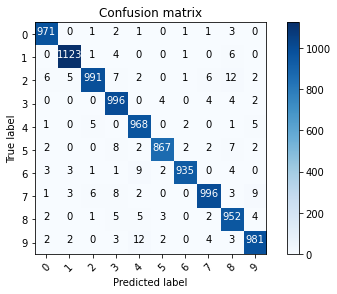

In [10]:

# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True label: 4 Predicted: 9')

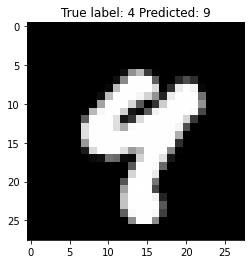

In [29]:
# Showing some misclassified examples, we get...
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]))